In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
pres_url = "../../will-data/countypres_2000-2020.csv"

In [96]:
pres = pd.read_csv(pres_url)

In [97]:
geo_url = "../../will-data/geo.csv"

In [98]:
geo = pd.read_csv(geo_url)

In [99]:
geo.head(2)

,Sort [1],State,FIPS,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
0,1,AL,1001,Autauga,Prattville,"54,571","1,539.582",594.436,25.776,9.952,"1,565.358",604.388,+32.536382°,–86.644490°
1,2,AL,1003,Baldwin,Bay Minette,"182,265","4,117.522","1,589.784","1,133.190",437.527,"5,250.712","2,027.311",+30.659218°,–87.746067°


In [100]:
pres.head(2)

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL


In [103]:
#pres cleanup
pres = pres.rename(columns={"county_fips":"FIPS"})
pres["FIPS"] = pres["FIPS"]
pres = pres[(pres["state_po"]=="TX") | (pres["state_po"]=="FL") | (pres["state_po"]=="CA") | (pres["state_po"]=="IL") | (pres["state_po"]=="MI")]
pres.dropna(inplace=True)
pres_cleaned = pres

In [104]:
pres_cleaned[pres_cleaned["state_po"]=="MI"].head(2)

,year,state,state_po,county_name,FIPS,office,candidate,party,candidatevotes,totalvotes,version,mode
4800,2000,MICHIGAN,MI,ALCONA,26001.0,PRESIDENT,AL GORE,DEMOCRAT,2696.0,5997.0,20191203,TOTAL
4801,2000,MICHIGAN,MI,ALCONA,26001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,3152.0,5997.0,20191203,TOTAL


In [105]:
pres_cleaned.head(2)

,year,state,state_po,county_name,FIPS,office,candidate,party,candidatevotes,totalvotes,version,mode
628,2000,CALIFORNIA,CA,ALAMEDA,6001.0,PRESIDENT,AL GORE,DEMOCRAT,342889.0,494336.0,20191203,TOTAL
629,2000,CALIFORNIA,CA,ALAMEDA,6001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,119279.0,494336.0,20191203,TOTAL


In [106]:
#geo cleanup
geo.replace(',','', regex=True, inplace=True)
geo["Longitude"] = geo["Longitude"].map(lambda l: float(l[1: -2])*-1 if l[0] == "–" else float(l[1: -2]))
geo["Latitude"] = geo["Latitude"].map(lambda l: float(l[1: -2])*-1 if l[0] == "–" else float(l[1: -2]))
geo["FIPS"] = geo['FIPS'].map(lambda x: int("0" + str(x)))
#geo = geo[(geo["State"]=="TX") | (geo["State"]=="FL") | (geo["State"]=="CA") | (geo["State"]=="IL")| (geo["State"]=="MI")]
geo.drop(["Land Areakm²", "Total Areakm²", "Water Areakm²", "County Seat(s) [3]", "Sort [1]", "County [2]", "State"], axis=1, inplace=True)
geo_clean = geo

In [107]:
geo_clean.head(2)

,FIPS,Population(2010),Land Areami²,Water Areami²,Total Areami²,Latitude,Longitude
0,1001,54571,594.436,9.952,604.388,32.53638,-86.64449
1,1003,182265,1589.784,437.527,2027.311,30.65921,-87.74606


In [108]:
pres_groups = list(pres_cleaned.groupby(['year', 'FIPS']).groups.keys())

In [109]:
row_cols = ["year", "FIPS", "office", "state", "dem_votes", "rep_votes", "county"]

In [110]:
pres_clean = pd.DataFrame(columns = row_cols)

In [111]:
error_group = None
for group in pres_groups:
    year = group[0]
    fips = group[1]
    office = 'president'
    g = pres_cleaned[(pres_cleaned['year'] == group[0]) & (pres_cleaned['FIPS'] == group[1])]
    g.index = np.arange(0, len(g))
    g_year = g.iloc[0]["year"]
    g_FIPS = g.iloc[0]["FIPS"]
    g_office = g.iloc[0]["office"]
    g_state = g.iloc[0]["state_po"]
    g_county = g.iloc[0]["county_name"]
    g_demvotes = g[g["party"]=="DEMOCRAT"]["candidatevotes"].values[0]
    g_repvotes = g[g["party"]=="REPUBLICAN"]["candidatevotes"].values[0]
    all_county = [[g_year, g_FIPS, g_office, g_state, g_demvotes , g_repvotes, g_county]]    
    pres_clean = pres_clean.append(pd.DataFrame(all_county, columns=row_cols))

In [112]:
pres_clean.to_csv("pres_clean.csv")

In [113]:
pres_clean = pd.read_csv('pres_clean.csv')

In [114]:
#additional pres_clean cleaning:
pres_clean["total_votes"] = pres_clean["dem_votes"] + pres_clean["rep_votes"]


In [115]:
pres_clean[pres_clean["state"]=="MI"]

,Unnamed: 0,year,FIPS,office,state,dem_votes,rep_votes,county,total_votes
227,0,2000,26001.0,PRESIDENT,MI,2696.0,3152.0,ALCONA,5848.0
228,0,2000,26003.0,PRESIDENT,MI,2071.0,2142.0,ALGER,4213.0
229,0,2000,26005.0,PRESIDENT,MI,15495.0,28197.0,ALLEGAN,43692.0
230,0,2000,26007.0,PRESIDENT,MI,7053.0,6769.0,ALPENA,13822.0
231,0,2000,26009.0,PRESIDENT,MI,4329.0,6780.0,ANTRIM,11109.0
...,...,...,...,...,...,...,...,...,...
3124,0,2020,26157.0,PRESIDENT,MI,8712.0,20297.0,TUSCOLA,29009.0
3125,0,2020,26159.0,PRESIDENT,MI,16803.0,21591.0,VAN BUREN,38394.0
3126,0,2020,26161.0,PRESIDENT,MI,157136.0,56241.0,WASHTENAW,213377.0
3127,0,2020,26163.0,PRESIDENT,MI,597170.0,264553.0,WAYNE,861723.0


In [116]:
# Create target column
pres_clean["target"] = pres_clean.apply(lambda row: 0 if row["dem_votes"] > row["rep_votes"] else 1, axis=1)

In [117]:
def win_percentage(row):
    if row["target"]==0:
        try:
            return round(row["dem_votes"]/row["total_votes"] *100, 2)
        except:
            return 0
    else:
        try:
            return round(row["rep_votes"]/row["total_votes"] *100, 2)
        except:
            return 0

In [118]:
def win_margin(row):
    if row["target"]==0:
        try:
            return round((row["dem_votes"]/row["total_votes"] *100) - 50, 2)
        except:
                return 0
    else:
        try:
            return round((row["rep_votes"]/row["total_votes"] *100) - 50, 2)
        except:
            return 0

In [119]:
def skew(row):
    if row["target"]==0:
        return row["win_margin"]*-1
    else:
        return row["win_margin"]

In [120]:
# def switch(row):
#     if row["target"]!=:
#         return row["win_margin"]*-1
#     else:
#         return row["win_margin"]

In [121]:
pd.read_csv('pres_clean.csv')

,Unnamed: 0,year,FIPS,office,state,dem_votes,rep_votes,county
0,0,2000,6001.0,PRESIDENT,CA,342889.0,119279.0,ALAMEDA
1,0,2000,6003.0,PRESIDENT,CA,265.0,281.0,ALPINE
2,0,2000,6005.0,PRESIDENT,CA,5906.0,8766.0,AMADOR
3,0,2000,6007.0,PRESIDENT,CA,31338.0,45584.0,BUTTE
4,0,2000,6009.0,PRESIDENT,CA,7093.0,10599.0,CALAVERAS
...,...,...,...,...,...,...,...,...
3378,0,2020,48499.0,PRESIDENT,TX,3509.0,19049.0,WOOD
3379,0,2020,48501.0,PRESIDENT,TX,420.0,2174.0,YOAKUM
3380,0,2020,48503.0,PRESIDENT,TX,1034.0,7110.0,YOUNG
3381,0,2020,48505.0,PRESIDENT,TX,1826.0,2033.0,ZAPATA


In [122]:
df_2016 = pres_clean[pres_clean.year == 2016][['FIPS','state', 'county', 'target']].rename(columns={'target':'target_2016'})
df_2020 = pres_clean[pres_clean.year == 2020][['FIPS','state', 'county', 'target']].rename(columns={'target':'target_2020'})


In [123]:
change = df_2016.merge(df_2020, on=['state', 'county'])

In [124]:
flipped = change[(change.target_2020 - change.target_2016) != 0]

In [125]:
flipped = flipped[flipped.state.isin(['MI', 'FL', 'TX', 'IL', 'CA'])]

In [126]:
pres_clean["win_percentage"] = pres_clean.apply(win_percentage, axis=1)
pres_clean["win_margin"] = pres_clean.apply(win_margin, axis=1)
pres_clean["skew"] = pres_clean.apply(skew, axis=1)

In [127]:
#for county in all unique counties, which one had the biggest change in skew

In [128]:
FIPS_groups = list(pres_cleaned.groupby(['FIPS']).groups.keys())

In [129]:
row_cols = ["all_skew_diff", "1620_skew_diff", "winner16", "winner20", "FIPS", "county", "state"]

In [130]:
top_skew = pd.DataFrame(columns = row_cols)

In [131]:
pres_clean.head(2)

,Unnamed: 0,year,FIPS,office,state,dem_votes,rep_votes,county,total_votes,target,win_percentage,win_margin,skew
0,0,2000,6001.0,PRESIDENT,CA,342889.0,119279.0,ALAMEDA,462168.0,0,74.19,24.19,-24.19
1,0,2000,6003.0,PRESIDENT,CA,265.0,281.0,ALPINE,546.0,1,51.47,1.47,1.47


In [132]:
df_2020 = pres_clean[pres_clean.year == 2020]

In [135]:
df_2020.FIPS = df_2020.FIPS.astype(int)

/Users/willcline/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


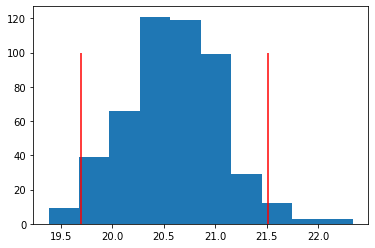

In [154]:
win_margin_2020 = pres_clean[pres_clean.year == 2020].win_margin
bootstrapped_margins = [np.random.choice(win_margin_2020, size=win_margin_2020.shape[0]).mean() for x in range(500)]
mean = np.mean(bootstrapped_margins)
std = np.std(bootstrapped_margins)
plt.hist(bootstrapped_margins)
plt.vlines(mean - std*2, 0, 100, color='red')
plt.vlines(mean + std*2, 0, 100, color='red')

In [ ]:
flip_fips = [12031,
 12039,
 12097,
 17037,
 17161,
 48229,
 48247,
 48249,
 48261,
 48273,
 48283,
 48377,
 48389,
 48465,
 48479]

In [168]:
tight = mean - std*2

In [171]:
df_2020flips = df_2020[df_2020.FIPS.isin(flip_fips)]

In [174]:
df_2020flips

,Unnamed: 0,year,FIPS,office,state,dem_votes,rep_votes,county,total_votes,target,win_percentage,win_margin,skew
2895,0,2020,12039,PRESIDENT,FL,16153.0,7465.0,GADSDEN,23618.0,0,68.39,18.39,-18.39
2925,0,2020,12097,PRESIDENT,FL,97297.0,73480.0,OSCEOLA,170777.0,0,56.97,6.97,-6.97
2926,0,2020,12099,PRESIDENT,FL,433572.0,334711.0,PALM BEACH,768283.0,0,56.43,6.43,-6.43
3024,0,2020,17161,PRESIDENT,IL,36691.0,28603.0,ROCK ISLAND,65294.0,0,56.19,6.19,-6.19
3025,0,2020,17163,PRESIDENT,IL,68325.0,57150.0,ST. CLAIR,125475.0,0,54.45,4.45,-4.45
3037,0,2020,17187,PRESIDENT,IL,3090.0,4676.0,WARREN,7766.0,1,60.21,10.21,10.21
3042,0,2020,17197,PRESIDENT,IL,183915.0,155116.0,WILL,339031.0,0,54.25,4.25,-4.25
3149,0,2020,48041,PRESIDENT,TX,35349.0,47530.0,BRAZOS,82879.0,1,57.35,7.35,7.35
3213,0,2020,48169,PRESIDENT,TX,231.0,1413.0,GARZA,1644.0,1,85.95,35.95,35.95
3243,0,2020,48229,PRESIDENT,TX,371.0,779.0,HUDSPETH,1150.0,1,67.74,17.74,17.74


In [202]:
df_2020flips["tight"] = df_2020flips.apply(lambda row: "Tight" if row["win_margin"]<tight else "Not tight", axis=1)

In [203]:
df_2020flips.sort_values(by="win_margin", inplace=True, ascending=True)

In [204]:
red = "#D33E69"
blue = "#2A3990"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'WILL'),
  Text(1, 0, 'ST. CLAIR'),
  Text(2, 0, 'ROCK ISLAND'),
  Text(3, 0, 'PALM BEACH'),
  Text(4, 0, 'OSCEOLA'),
  Text(5, 0, 'BRAZOS'),
  Text(6, 0, 'WARREN'),
  Text(7, 0, 'WEBB'),
  Text(8, 0, 'PRESIDIO'),
  Text(9, 0, 'HUDSPETH'),
  Text(10, 0, 'GADSDEN'),
  Text(11, 0, 'WILBARGER'),
  Text(12, 0, 'REAGAN'),
  Text(13, 0, 'GARZA')])

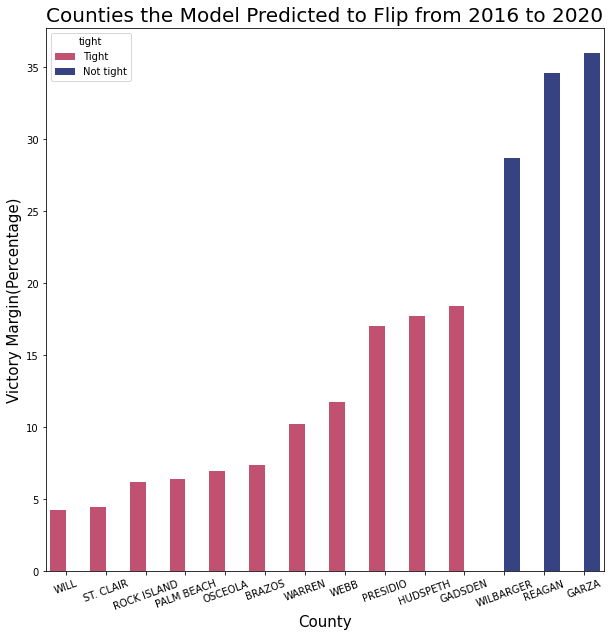

In [210]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df_2020flips, x=df_2020flips["county"],y=df_2020flips["win_margin"], ax=ax, palette = [red, blue], hue=df_2020flips["tight"]);
plt.title("Counties the Model Predicted to Flip from 2016 to 2020", size=20)
plt.ylabel("Victory Margin(Percentage)", size=15)
plt.xlabel("County", size=15)
plt.xticks(rotation=20)

In [206]:
pred_flips_tight = df_2020flips[df_2020flips["win_margin"]< tight]

In [163]:
len(pred_flips_tight)

11

In [165]:
len(pred_flips_tight)/ len(flip_fips) *100

78.57142857142857

In [42]:
for fips in FIPS_groups:
    try:
        g = pres_clean[pres_clean["FIPS"]==fips]
        g = g.reset_index(drop=True)
        g_FIPS = g.iloc[0]["FIPS"]
        g_all_skew_diff = ((np.abs(g.iloc[0]["skew"] - g.iloc[len(g)-2]["skew"]))+ (np.abs(g.iloc[1]["skew"] - g.iloc[len(g)-1]["skew"])))/2
        g_1620_skew_diff = (np.abs(g.iloc[-2]["skew"] - g.iloc[len(g)-1]["skew"]))
        g_state = g.iloc[0]["state"]
        g_county = g.iloc[0]["county"]
        g_winner16 = g.iloc[-2].map(lambda row: "dem" if row["target"] == 0 else "Rep")
        g_winner20 = g.iloc[-1].map(lambda row: "dem" if row["target"] == 0 else "Rep")
        row = [[g_all_skew_diff, g_1620_skew_diff, g_winner16, g_winner20, g_FIPS, g_county, g_state]]
        top_skew = top_skew.append(pd.DataFrame(row, columns=row_cols))
    except:
        pass

In [51]:
pres_clean.iloc[0]

RecursionError: maximum recursion depth exceeded while calling a Python object

In [45]:
pred_flips = top_skew[top_skew['FIPS'].isin(flip_fips)]

In [46]:
pred_flips

,all_skew_diff,1620_skew_diff,winner16,winner20,FIPS,county,state


In [47]:
j = pres_clean.merge(geo_clean, on="FIPS", how="inner")

In [ ]:
j

In [ ]:
j[j["year"]==2016].shape

In [ ]:
o = top_skew.merge(geo_clean, on="FIPS", how="inner")

In [ ]:
o.drop(["Land Areami²","Water Areami²", "Total Areami²"], axis=1, inplace=True)

In [ ]:
o.sort_values(by="1620_skew_diff", ascending=False, inplace=True)

In [ ]:
o.head(2)

## Visualizations

#### 1 = Republican win, 0 = Democrat win

In [ ]:
sum_rep = j.rep_votes.sum()

In [ ]:
sum_dem = j.dem_votes.sum()

In [ ]:
sum_total_votes = sum_rep + sum_dem

In [ ]:
def vote_inferential(df):
    sum_rep = j.rep_votes.sum()
    sum_dem = j.dem_votes.sum()
    sum_total = sum_rep + sum_dem
    rep_vote_per = round(sum_rep/sum_total *100, 2)
    dem_vote_per = round(sum_dem/sum_total *100, 2)
    return (rep_vote_per, dem_vote_per)

In [ ]:
vote_inferential(j)

In [ ]:
j.target.value_counts(normalize=True)

In [ ]:
red = "#D33E69"
blue = "#2A3990"

In [ ]:
austin_fips = 48015

In [ ]:
#for rj[j["FIPS"]==austin_fips]

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title("Total Votes v. Total Counties Won", size=20)
plt.tick_params(axis='both', labelsize=12)
plt.ylabel("Percentage", size=15)
sns.barplot(["R. Votes", "D. Votes", "R. Counties Won", "B. Counties Won"], [46.13,57.87, 81.67,18.34], palette=[red, blue, red, blue]);

In [ ]:
wm = j[["win_margin"]]

In [ ]:
wm["skew"] = j["skew"]

In [ ]:
wm["likelihood"] = wm["win_margin"].map(lambda margin: "unlikely" if margin > 30 else "likely")

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=wm, x=wm["win_margin"], bins=20, ax=ax, palette = [red, blue], hue=wm["likelihood"])
plt.text(wm["win_margin"].mean()+1, 150, "Mean", color = "black", size=15, fontweight='bold')
plt.text(wm["win_margin"].mean()+1, 137, "(19%)", color = "black", size=15, fontweight='bold')
plt.vlines(wm["win_margin"].mean(), 0, 210, color="black", linewidth=6)
plt.title("Win Margin Percentage Distribution", size=20)
plt.ylabel("County Elections", size=15)
plt.xlabel("Win Margin(Percentage)", size=15)